In [1]:
from os.path import abspath
import numpy as np
import matplotlib.pyplot as plt
from random import uniform as urandom

In [2]:
def load_data(path):
    output_data = []
    with open(path) as input_file:
        for line in input_file:
            one_row = line.split(',')
            output_data.append([float(one_row[0]), float(one_row[1]), -1.0])
            
    return np.array(output_data)

In [3]:
def generate_centroid(size, min_val, max_val):
    return [urandom(min_val, max_val) for _ in range(size)]

In [4]:
def generate_random_centroids(centroids_amount, size, min_val=0.0, max_val=1.0):
    return np.array([generate_centroid(size, min_val, max_val) for _ in range(centroids_amount)])

In [5]:
def compare_centroids(prev_centroids, new_centroids):
    for item in np.absolute(prev_centroids.flatten() - new_centroids.flatten()):
        if item > 0.0001:
            return False
        
    return True

In [6]:
def calculate_closets_centroid(sample, centroids):
    distances = [np.linalg.norm(sample - centroid) for centroid in centroids]
    return np.argmin(distances)

In [7]:
def assign_centroids(data, centroids):
    for i in range(len(data)):
        data[i][-1] = calculate_closets_centroid(data[i][:-1], centroids)

    return [data, centroids]

In [8]:
def calculate_new_centroid(cluster_data):
    return np.array([np.mean(cluster_data[:, i]) for i in range(len(cluster_data[0]))])

In [9]:
def recalculate_centroids(labeled_data, clusters_amount, old_centroids):
    output = np.array([[0.0, 0.0]])
    for i in range(clusters_amount):
        cluster_data = np.array([sample for sample in labeled_data if sample[-1] == float(i)])
        if len(cluster_data) > 0:
            output = np.vstack((output, calculate_new_centroid(cluster_data)[:-1]))
        else:
            output = np.vstack((output, old_centroids[i]))
            
    return output[1:]

In [10]:
def run_kmeans(data, clusters_amount):
    min_val = data[:, :-1].min()
    max_val = data[:, :-1].max()
    centroids = generate_random_centroids(clusters_amount, len(data[0]) - 1, min_val, max_val)

    while True:
        output = assign_centroids(data, centroids)
        centroids = recalculate_centroids(output[0], clusters_amount, centroids)
        if compare_centroids(output[1], centroids):
            break
        
    return [data, centroids]

In [18]:
def plot_data(data, centroids, cluster_amount):
    colors = ['blue', 'green', 'red', 'magenta', 'yellow', 'gray']

    plot = plt.figure().add_subplot(111)
    for i in range(cluster_amount):
        cluster_data = np.array([sample for sample in data if sample[-1] == float(i)])
        plot.scatter(cluster_data[:, 0], cluster_data[:, 1], s=10, color=colors[i])
    
    for j in range(len(centroids)):
        plot.scatter(centroids[:, 0], centroids[:, 1], s=20, color='black')
    
    plt.show()

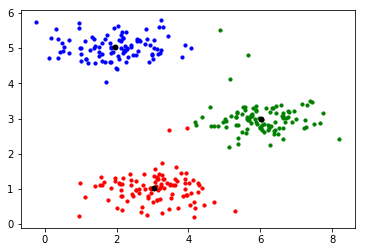

In [20]:
def kmeans(clusters_amount, file_path):
    data = load_data(file_path)
    output_data = run_kmeans(data, clusters_amount)
    plot_data(output_data[0], output_data[1], clusters_amount)
 
   
kmeans(3, abspath('demo\init\coursera\kmeans\data\kmeans_dataset.csv'))